In [41]:
#Import Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as z


In [42]:
#Installl factor_analyzer
! pip install factor_analyzer

In [43]:
from factor_analyzer import FactorAnalyzer 
from factor_analyzer import calculate_kmo as kmo
from factor_analyzer import calculate_bartlett_sphericity as bartlett

In [44]:
mydata = pd.read_excel("C:/Users/tsaip/Downloads/Data files for upcoming classes (1)/Factor_Analysis_Example.xlsx")

In [45]:
mydata

,Respondent,x1,x2,x3,x4,x5,x6
0,1,3,4,2,3,6,3
1,2,6,4,7,4,1,4
2,3,4,6,4,5,3,6
3,4,1,3,2,2,6,4
4,5,4,6,4,5,3,6
...,...,...,...,...,...,...,...
95,96,3,5,4,6,4,7
96,97,7,3,6,4,2,4
97,98,7,3,7,4,1,4
98,99,7,2,6,4,1,3


In [46]:
mydata.head(5)

,Respondent,x1,x2,x3,x4,x5,x6
0,1,3,4,2,3,6,3
1,2,6,4,7,4,1,4
2,3,4,6,4,5,3,6
3,4,1,3,2,2,6,4
4,5,4,6,4,5,3,6


In [47]:
#Clean up data
mydata=mydata.iloc[:,1:]

In [48]:
mydata.head()

,x1,x2,x3,x4,x5,x6
0,3,4,2,3,6,3
1,6,4,7,4,1,4
2,4,6,4,5,3,6
3,1,3,2,2,6,4
4,4,6,4,5,3,6


In [49]:
#Preliminary Analysis _ Correlation matrix
round(mydata.corr(),3)

,x1,x2,x3,x4,x5,x6
x1,1.000,-0.081,0.881,-0.083,-0.866,-0.024
x2,-0.081,1.000,-0.167,0.574,0.058,0.650
x3,0.881,-0.167,1.000,-0.246,-0.787,-0.048
x4,-0.083,0.574,-0.246,1.000,-0.000,0.644
x5,-0.866,0.058,-0.787,-0.000,1.000,-0.096
x6,-0.024,0.650,-0.048,0.644,-0.096,1.000


In [50]:
# As coreelation exists we go ahead with Factor analysis

In [51]:
#Scale the data
myzdata = z().fit_transform(mydata)

In [52]:
myzdata

array([[-0.48621464,  0.08203703, -1.04518558, -0.79530824,  1.30896686,
        -0.86596105],
       [ 1.03320612,  0.08203703,  1.4083017 , -0.04501745, -1.33007923,
        -0.1194429 ],
       [ 0.02025894,  1.57361936, -0.06379067,  0.70527335, -0.27446079,
         1.37359339],
       [-1.49916182, -0.66375414, -1.04518558, -1.54559904,  1.30896686,
        -0.1194429 ],
       [ 0.02025894,  1.57361936, -0.06379067,  0.70527335, -0.27446079,
         1.37359339],
       [-0.48621464,  0.08203703, -1.04518558, -0.79530824,  1.30896686,
        -0.86596105],
       [-0.99268823,  1.57361936, -1.04518558,  1.45556414,  1.83677608,
         1.37359339],
       [-0.48621464,  0.82782819, -0.55448812,  1.45556414,  0.25334843,
         1.37359339],
       [-1.49916182, -0.66375414, -1.04518558, -0.79530824,  0.78115764,
        -0.86596105],
       [ 0.52673253,  0.08203703,  0.42690679, -0.04501745, -0.80227001,
        -0.1194429 ],
       [-1.49916182, -0.66375414, -1.04518558, -0.

In [53]:
myzdata = pd.DataFrame(myzdata,columns=mydata.columns)

In [54]:
myzdata.head()

,x1,x2,x3,x4,x5,x6
0,-0.486215,0.082037,-1.045186,-0.795308,1.308967,-0.865961
1,1.033206,0.082037,1.408302,-0.045017,-1.330079,-0.119443
2,0.020259,1.573619,-0.063791,0.705273,-0.274461,1.373593
3,-1.499162,-0.663754,-1.045186,-1.545599,1.308967,-0.119443
4,0.020259,1.573619,-0.063791,0.705273,-0.274461,1.373593


In [55]:
#Compute KMO statistic
mykmo = kmo(myzdata)

In [56]:
mykmo
mykmo[1]

0.6618310518029493

In [57]:
#KMO is greater than 0.5 so continue with Factor Analysis

In [58]:
#Bartletts test _ to see whether correlation is significant or not
mytest=bartlett(myzdata)

In [59]:
mytest

(421.24641161190704, 2.3534681972473516e-80)

In [60]:
#Test statistic
mytest[0]

421.24641161190704

In [61]:
#pvalue
mytest[1]

2.3534681972473516e-80

In [62]:
#As pvalue less than 0.05 we aaccept the alternative hypothesis that Correlation matrix is not  Identity matrix


In [63]:
#Identification of factors
mymodel=FactorAnalyzer(n_factors=6,rotation=None)

In [64]:
#Fit the model to data
mymodel = mymodel.fit(myzdata)

In [65]:
#Result 
myresult = mymodel.get_eigenvalues()

In [66]:
myresult

(array([2.77889479, 2.18900091, 0.44504631, 0.33278528, 0.17473992,
        0.0795328 ]),
 array([ 2.68742736e+00,  1.92890102e+00,  1.77083247e-01,  1.04524683e-01,
         1.88503080e-02, -1.43874534e-06]))

In [67]:
#Eigen values
eigen_values=myresult[0]

In [68]:
eigen_values =pd.DataFrame(eigen_values,columns=['Variance'])

In [69]:
eigen_values

,Variance
0,2.778895
1,2.189001
2,0.445046
3,0.332785
4,0.174740
5,0.079533


In [70]:
#We need only 2 factors as variance greater than 1 2 cases


In [89]:
eigen_values['var_per'] = eigen_values*100/(eigen_values).sum()

In [90]:
eigen_values

,Variance,var_per
0,2.778895,46.314913
1,2.189001,36.483348
2,0.445046,7.417438
3,0.332785,5.546421
4,0.174740,2.912332
5,0.079533,1.325547


In [91]:
eigen_values['Cumm_var'] = var_per.cumsum()

In [92]:
eigen_values

,Variance,var_per,Cumm_var
0,2.778895,46.314913,46.314913
1,2.189001,36.483348,82.798262
2,0.445046,7.417438,90.215700
3,0.332785,5.546421,95.762121
4,0.174740,2.912332,98.674453
5,0.079533,1.325547,100.000000


In [86]:
myVarianceTable = mymodel.get_factor_variance()

In [87]:
myVarianceTable=pd.DataFrame(myVarianceTable)

In [88]:
myVarianceTable

,0,1,2,3,4,5
0,2.687427,1.928901,0.177083,0.104524,0.018850,0.000000
1,0.447905,0.321483,0.029514,0.017421,0.003142,0.000000
2,0.447905,0.769388,0.798902,0.816323,0.819464,0.819464


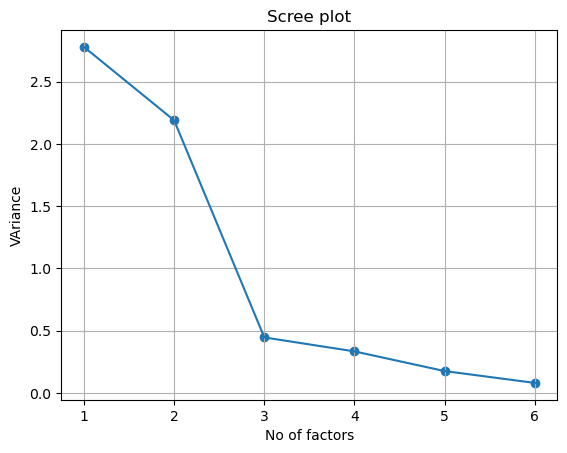

In [101]:
#Scree plot
k = range(1,7)
plt.scatter(k,eigen_values['Variance'])
plt.plot(k,eigen_values['Variance'])
plt.title('Scree plot')
plt.xlabel('No of factors')
plt.ylabel('VAriance')
plt.grid()


In [ ]:
# So optimum no of factors is 2 from 3 methods


In [102]:
#Final Analysis
mymodel=FactorAnalyzer(n_factors=2,rotation='varimax')

In [103]:
#Fit the model to data
mymodel=mymodel.fit(myzdata)

In [104]:
#Factor Loadings
myloadings = mymodel.loadings_

In [105]:
myloadings

array([[ 0.96980324, -0.0448893 ],
       [-0.06780193,  0.75198874],
       [ 0.90078685, -0.15895254],
       [-0.07567655,  0.76518977],
       [-0.88942196, -0.05024372],
       [ 0.0549727 ,  0.8546576 ]])

In [106]:
myloadings=pd.DataFrame(myloadings)

In [107]:
myloadings

,0,1
0,0.969803,-0.044889
1,-0.067802,0.751989
2,0.900787,-0.158953
3,-0.075677,0.765190
4,-0.889422,-0.050244
5,0.054973,0.854658


In [108]:
#Factor Scores
myscores= mymodel.fit_transform(myzdata)

In [109]:
myscores=pd.DataFrame(myscores)

In [110]:
myscores

,0,1
0,-0.772701,-0.567784
1,1.137412,-0.107893
2,0.121952,1.314105
3,-1.361831,-0.685627
4,0.121952,1.314105
...,...,...
95,-0.232620,1.614690
96,1.342513,-0.177168
97,1.504196,-0.236853
98,1.363594,-0.727159
